In [4]:
import pandas as pd

df = pd.read_csv("salary prediction.zip")  # Change filename as needed
df.head()  # Display first few rows


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.info()  # Data types, missing values
df.describe()  # Statistical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [7]:
df.isnull().sum()  # Check for null values
df.dropna(inplace=True)  # Remove missing rows (or use imputation)


In [13]:
df = pd.get_dummies(df, columns=['Job Title', 'Education Level'], drop_first=True)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Years of Experience']] = scaler.fit_transform(df[['Years of Experience']])


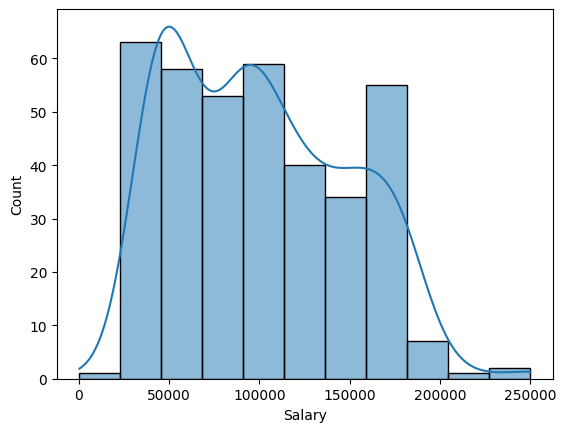

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Salary'], kde=True)
plt.show()


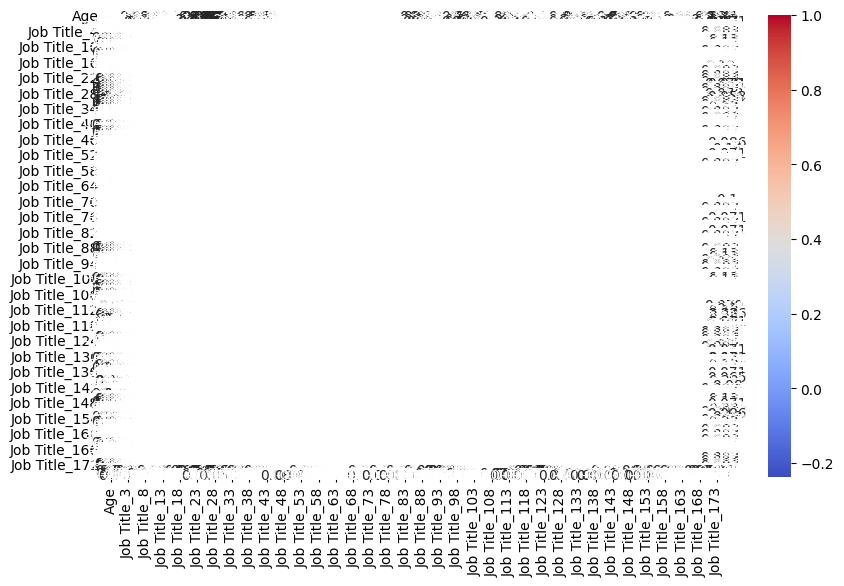

In [20]:
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical columns to numerical
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Salary'])  # Features
y = df['Salary']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Convert categorical features to numerical using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=['Salary'])  # Drop target variable
y = df_encoded['Salary']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 11596.521058222565
MSE: 354248539.00766945
R2 Score: 0.8522475952130931


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
